

# Project: Investigate a  Gapminder Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **The data set**: I choose a data set from the Gapminder foundation website, for my analysis, I choose six indicators the first is employment rate in the population aged 15+, the second one is child mortality under 5 per 100 born, the third is GDP per capita en-us dollar which is has been adjusted for inflation, the fourth is life expectancy in years, the fifth one is mean years in school for men and women aged between 15 and 34, the last one is population growth. My analysis is going to focus on the period 1991 to 2013.  

## Questions
<ol>
    <li> The first question I am going to ask how these indicators have changed over time for my home country Morroco, and my continent Africa, and in our world. 
    <li> The second question is how different regions in the world doing in some of these factors. 
    <li> The third question How many countries had an above averege life expectancy in the year 2013
     <li> The fourth question is there a relationship between some of these indicators?
</ol>  

In [118]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import country_converter as pc
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> ** Clean **: In the next few cells, I will clean the data by first getting rid of the column I don't need to fit the period I choose then I will fill the missing data.



In [119]:
# loading data 
employement = pd.read_csv('aged_15plus_employment_rate_percent.csv')
child_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
life_expectancy = pd.read_csv('life_expectancy_years.csv')
school_years = pd.read_csv('mean_years_in_school_women_percent_men_25_to_34_years.csv')
pop = pd.read_csv('population_growth_annual_percent.csv')
pop.head(2)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1.82,1.88,1.94,1.99,2.05,2.11,2.13,2.15,2.21,...,2.510,2.570,2.810,3.100,3.270,3.320,3.180,2.940,2.69,2.490
1,Albania,3.02,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,...,-0.767,-0.674,-0.496,-0.269,-0.165,-0.183,-0.207,-0.291,-0.16,-0.092


In [120]:
cols = ['country'] + child_mortality.loc[: , '1991':'2013'].columns.to_list()

### Data Cleaning : Select  columns and filing missing data 
> ** Missing data **: In the next cell, I will select the desired columns and filing the missing data. I am going to use bfill() and ffill() function which I think is more appropriate as opposed to the mean or the median considering that the data is collected over a timeline, but this method, in this case, has a drawback especially if we have a row with multiple consecutive missing values a better way or missing values I  guess would be a regression. 

In [121]:
# Selecting columns and filing missing values 
employement = employement[cols]
child_mortality = child_mortality[cols]
gdp = gdp[cols]
gdp = gdp.fillna(method='bfill', axis=1)
gdp = gdp.fillna(method='ffill', axis=1)
life_expectancy = life_expectancy[cols]
school_years = school_years[cols]
pop = pop[cols]
pop = pop.fillna(method='bfill', axis=1)
pop = pop.fillna(method='ffill', axis=1)


In [122]:
pop.head(2)

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,5.900,7.330,7.67,6.900,5.570,4.140,3.090,2.590,2.820,...,4.470,3.870,3.230,2.760,2.510,2.570,2.810,3.100,3.270,3.320
1,Albania,-0.603,-0.606,-0.61,-0.614,-0.618,-0.622,-0.625,-0.629,-0.633,...,-0.418,-0.512,-0.631,-0.756,-0.767,-0.674,-0.496,-0.269,-0.165,-0.183


## More cleaning
<p> 
    In the next cell, I will create a function to add a column called continent to each of the datasets which will hold for each country which continent they are in, so I can compare region later
    </p>

In [123]:

# This function will add column that specifie the continent for each country
def convert(data):
    codes_iso3 = pc.convert(names=list(data['country']), to='ISO3')
    data['continent'] = pc.convert(names=codes_iso3, src = 'ISO3', to = 'continent')
    return data

# add the continent column to each datasets 
pop = convert(pop)
employement= convert(employement)
child_mortality = convert(child_mortality)
gdp = convert(gdp)
life_expectancy = convert(life_expectancy)
school_years = convert(school_years)


In [124]:
pop.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1.694493,1.661062,1.619679,1.550672,1.504155,1.491231,1.527828,1.505915,1.512849,1.488799,...,1.521566,1.565394,1.608605,1.613855,1.631345,1.584846,1.528262,1.458145,1.472926,1.467456
std,1.563415,1.564972,1.619638,1.509011,1.358256,1.339327,1.366719,1.447311,1.356959,1.304332,...,1.482994,1.661708,1.842947,1.922515,1.863377,1.676872,1.536419,1.513698,1.446175,1.441213
min,-5.810000,-5.090000,-6.180000,-4.790000,-2.700000,-3.820000,-1.850000,-1.730000,-0.953000,-2.850000,...,-1.300000,-1.630000,-1.600000,-1.480000,-1.670000,-1.650000,-2.100000,-2.630000,-2.150000,-3.040000
25%,0.632750,0.670000,0.589750,0.506250,0.514500,0.538500,0.510500,0.454000,0.486250,0.579750,...,0.591750,0.582750,0.563250,0.560000,0.604500,0.526750,0.491750,0.435250,0.467000,0.490000
50%,1.890000,1.735000,1.710000,1.615000,1.530000,1.550000,1.570000,1.515000,1.485000,1.455000,...,1.330000,1.355000,1.375000,1.310000,1.355000,1.300000,1.290000,1.300000,1.300000,1.285000
75%,2.687500,2.667500,2.647500,2.577500,2.555000,2.497500,2.485000,2.415000,2.412500,2.420000,...,2.475000,2.527500,2.430000,2.440000,2.377500,2.390000,2.352500,2.330000,2.305000,2.307500
max,6.020000,7.330000,7.670000,6.900000,5.570000,5.520000,7.360000,7.920000,7.280000,5.540000,...,9.720000,13.100000,15.600000,16.300000,15.500000,13.500000,11.200000,9.250000,7.760000,7.060000


In [125]:
life_expectancy.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,66.302674,66.358289,66.370588,66.232299,66.480214,66.687166,66.818717,66.980749,67.142781,67.486096,...,68.508556,68.842246,69.193048,69.542246,69.852941,70.210695,70.475936,70.910695,71.309091,71.642781
std,8.837745,8.843604,8.935681,9.889556,9.114804,9.241808,9.400001,9.459742,9.563741,9.517975,...,9.432313,9.368707,9.234642,9.080564,8.921831,8.705072,8.923902,8.343756,8.052334,7.882115
min,46.900000,46.500000,46.100000,9.640000,44.300000,43.900000,43.600000,44.300000,43.400000,44.300000,...,43.900000,43.600000,43.900000,44.200000,44.500000,44.900000,32.500000,48.000000,48.900000,48.500000
25%,60.050000,60.150000,60.200000,60.600000,60.350000,60.150000,60.200000,60.150000,59.950000,60.550000,...,61.600000,61.700000,62.050000,62.450000,62.700000,63.300000,63.900000,64.200000,65.000000,65.450000
50%,69.700000,69.400000,69.200000,69.500000,69.400000,70.100000,70.400000,70.600000,70.700000,71.100000,...,71.900000,72.200000,72.600000,72.600000,72.800000,72.900000,73.300000,73.400000,73.200000,73.100000
75%,72.500000,72.600000,72.800000,73.100000,73.300000,73.400000,73.750000,73.800000,74.050000,74.500000,...,75.500000,75.600000,76.000000,76.300000,76.450000,76.750000,77.000000,77.150000,77.450000,77.600000
max,79.400000,79.500000,79.700000,80.100000,80.000000,80.500000,80.800000,80.800000,81.000000,81.400000,...,82.300000,82.300000,82.600000,82.800000,82.900000,83.100000,83.200000,83.400000,83.600000,83.900000


In [126]:
school_years.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,83.710695,84.139572,84.575936,84.983422,85.358289,85.762032,86.160428,86.550802,86.895187,87.277005,...,88.660428,89.016043,89.337433,89.616578,89.919786,90.252406,90.575401,90.845989,91.139037,91.409091
std,22.727433,22.603498,22.503276,22.363271,22.216352,22.123101,22.009955,21.920890,21.795245,21.685934,...,21.253423,21.168722,21.055536,20.913637,20.784149,20.683798,20.584197,20.446251,20.331461,20.184908
min,17.600000,18.200000,18.800000,19.200000,19.100000,19.400000,19.700000,19.900000,20.100000,20.300000,...,21.300000,21.400000,21.500000,21.900000,22.200000,22.300000,22.600000,22.900000,23.100000,23.400000
25%,67.350000,67.850000,68.500000,69.350000,70.100000,70.800000,71.550000,72.300000,73.150000,73.950000,...,76.900000,77.450000,78.000000,78.550000,79.150000,79.650000,80.250000,80.800000,81.250000,81.750000
50%,94.900000,95.200000,95.300000,95.400000,95.700000,96.300000,96.800000,97.100000,97.400000,97.700000,...,98.800000,99.100000,99.400000,99.700000,99.900000,100.000000,100.000000,101.000000,101.000000,101.000000
75%,101.000000,101.000000,101.000000,101.500000,102.000000,102.000000,102.000000,102.000000,103.000000,103.000000,...,103.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.500000,105.000000,105.000000,105.000000
max,128.000000,128.000000,128.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,126.000000,126.000000,127.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000


<a id='eda'></a>
## Exploratory Data Analysis

<h6>Question 1</h6> 
 <p>The first question I am going to address is how these indicators have changed over time for my home country Morroco and my continent Africa and in our world. </p>

In [127]:
# this function will select the data for my country from each of the datasets.
def transform_m(data):
    data.set_index(['country', 'continent'], inplace=True)
    data1 = data.loc['Morocco', 'Africa']
    data.reset_index(inplace=True)
    return (data1 - np.min(data1))/(np.max(data1) - np.min(data1))


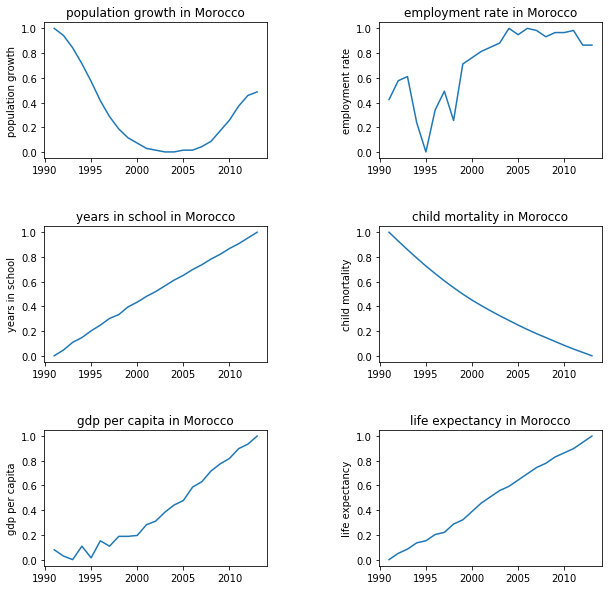

In [128]:
# ploting each factor in diffrent plot 
datasets = [pop, employement, school_years, child_mortality, gdp, life_expectancy]
labels = ['population growth', 'employment rate', 'years in school', 'child mortality', 'gdp per capita','life expectancy']
plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 3, wspace=0.5, hspace=0.5)
for data, i , label in  zip(datasets,range(6),labels):
    plt.subplot(gs[i//2, i%2])
    plt.plot(range(1991, 2014),transform_m(data))
    plt.ylabel(label)
    plt.title(label + ' in Morocco')
    
    

## Morroco plots analysis
<p>
  I can see from this charts above that, in general, getting better in my home country. for example child mortality dropped significantly since 1991, on the other hand, life expectancy rose steadily in the period 1991 through 2013, the same thing could be said about GDP per capita, as for population growth we see a significant drop between 1991 and 2005 then it starts rising again, the chart with the most fluctuation is the employment rate, the employment rate had ups and downs in the last decade of the last century and had nice steady growth since the start of the new century, but since 2007 it begins to fluctuate again which to be expected given the last recession.
    </p>

In [129]:
def transform_a(data):
    data1 = data.groupby('continent').mean().loc['Africa',:]
    return (data1 - np.min(data1))/(np.max(data1) - np.min(data1))

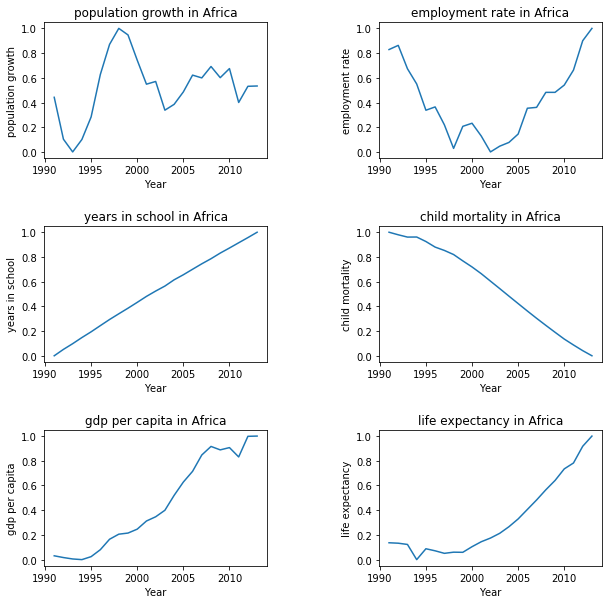

In [130]:
plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 3, wspace=0.5, hspace=0.5)
for data, i, label in  zip(datasets, range(6), labels):
    plt.subplot(gs[i//2, i%2])
    plt.plot(range(1991, 2014),transform_a(data))
    plt.ylabel(label)
    plt.xlabel('Year')
    plt.title(label + ' in Africa')

## Africa plots analysis
<p>
  In Africa things also getting better, in this plots we can see that population growth change a lot it drops at the beginning of the 1990s, one possible reason for this it's the AIDS pandemic, then it rose again until it hits the pick in this period around 1997 then it fell until around 2003 when it starts rising again and fluctuate, as of child mortality it drops steadily since the 1990s. The number of years in school for Africans is rising since 1991 the same things could be said about GDP per capita and life expectancy, as of employment rate it did badly since 1991 through around 2002, but things get better from there where we see a steady growth of employment.
</p>

In [131]:
def transform_w(data):
    return (data.mean() - np.min(data.mean()))/(np.max(data.mean()) - np.min(data.mean()))


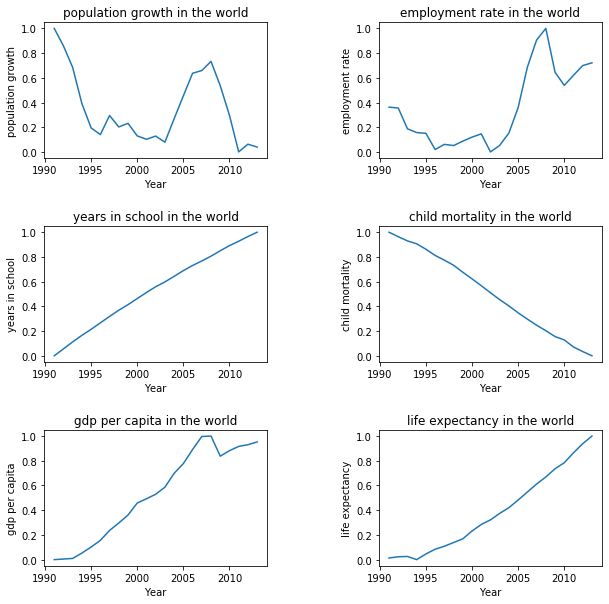

In [132]:
plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 3, wspace=0.5, hspace=0.5)
for data, i, label in  zip(datasets, range(6), labels):
    plt.subplot(gs[i//2, i%2])
    plt.plot(range(1991, 2014),transform_w(data))
    plt.ylabel(label)
    plt.xlabel('Year')
    plt.title(label + ' in the world')
    
    

## World plots analysis
<p>
In these plots about the world, we see also that things generally getting better. the number of years in school for the citizen of the world between 1991 and 2013 rose significantly the same thing could be said about life expectancy and gdb per capita except around the last recession, on the other hand, we observe a steady fall of child mortality. the plots that fluctuate are population growth and employment rate. As of population growth, it generally fell from 1991 until 2004 when it starts raising again but it fell again since 2009. For the employment rate, it starts by falling at the beginning of the 1990s the rose a little bit, then it took off until the recession, but it recovers when the economy starts recovering.  
</p>

## Question 2
<p> 
  The second question is how different regions in the world doing in some of these factors.
</p>

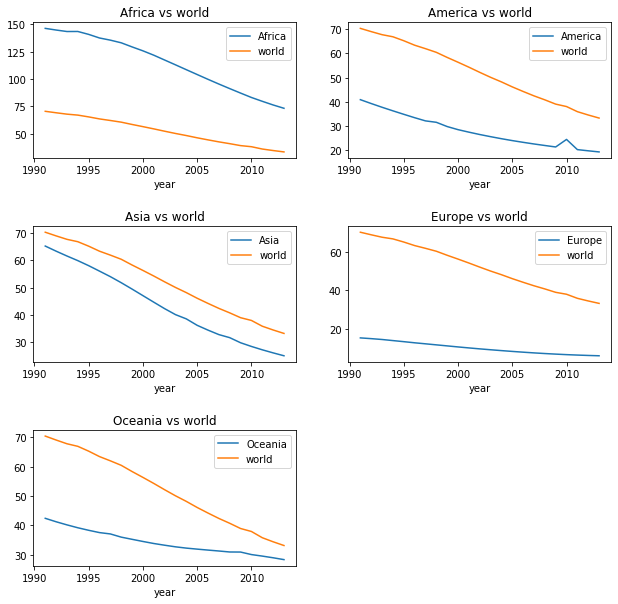

In [133]:
# plotting each continent child mortality against that's of the world
plt.figure(figsize=(16,10))
gs = plt.GridSpec(3, 3, hspace=0.5)
continent = list(pop.groupby('continent').mean().index)
for  i, cont in  zip(range(6), continent):
    plt.subplot(gs[i//2, i%2])
    plt.plot(range(1991,2014), child_mortality.groupby('continent').mean().loc[cont], label=cont)
    plt.plot(range(1991,2014), child_mortality.mean(), label='world')
    plt.title(cont + ' vs world')
    plt.xlabel('year')
    plt.rcParams['axes.axisbelow'] = True
    plt.legend()
    
    
    

## Compare continent to the world in child mortality 
<p>
    I  can see from charts that Africa have  higher child mortality rate compared to the rest of the world, so a lot need to be done to improve our continent 
</p>

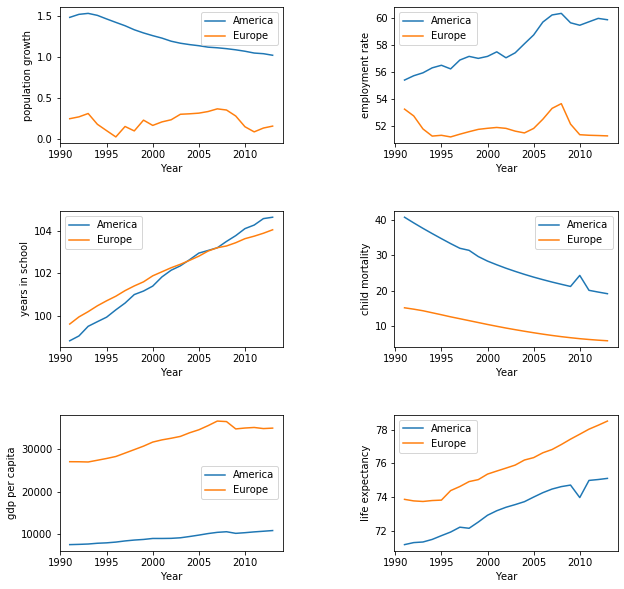

In [134]:
plt.figure(figsize=(16,10))
gs = plt.GridSpec(3, 3, wspace=0.5, hspace=0.5)
#fig, axs = plt.subplots(3,2, figsize=(15, 8), sharex=True, sharey=True)
for data, i, label,  in  zip(datasets, range(6), labels):
    plt.subplot(gs[i//2, i%2])
    plt.plot(range(1991,2014), data.groupby('continent').mean().loc['America'], label='America')
    plt.plot(range(1991,2014), data.groupby('continent').mean().loc['Europe'], label='Europe')
    plt.ylabel(label)
    plt.xlabel('Year')
    plt.legend()


## comarison between amireca and europe 
<p>
  In this comparison I  can see that in America the growth of the population is declining, on the other hand, there is more fluctuation in Europe. The employment rate the observer can see that America has a more or less steady growth than Europe. As of years in school, we observe that at the beginning of the 1990s Europe was better but around 2004 America overtook Europe, a child is much better in Europe than in America, also the life expectancy factor is much better in  Europe than in America.
    </p>
    

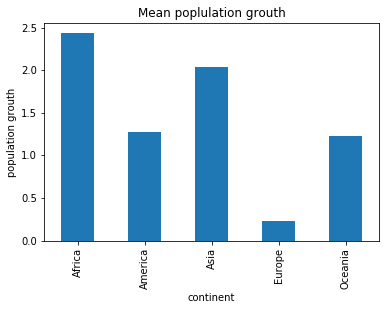

In [135]:
pop1 = pop.loc[:, 'country':'2011']

pop1['mean'] = np.mean(pop1, axis=1)
pop1.groupby('continent').mean()['mean'].plot(kind='bar');
plt.ylabel('population grouth')
plt.title('Mean poplulation grouth');

## Mean population grouth
<p>
  in the plot above w can see that Africa had the highest mean population growth with Asia close behind, and Europe had the lowest population growth.
</p>

## Question 3
<p>
    How many countries had an above averege life expectancy in the year 2013
</p>

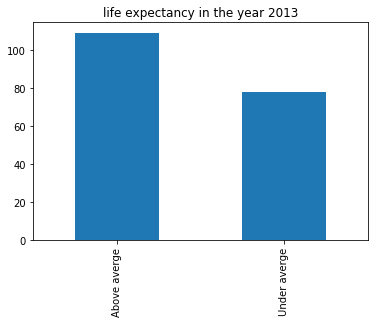

In [136]:
is_above_averge = life_expectancy['2013'] >= life_expectancy['2013'].mean()
ax = is_above_averge.value_counts().plot(kind='bar' )
ax.xaxis.set_ticklabels(['Above averge', 'Under averge'])
ax.set_title('life expectancy in the year 2013');

<p>
 The bar plot above shows that in the world of 2013 the maojorty of countries had an above averge life expectancy 
</p>

## Question 4
<p> 
 The third question is there a relationship between these indicators
</p>

In [137]:
# This function will make the three datasets the same shape
countries = set(life_expectancy['country']) & set(child_mortality['country']) & set(gdp['country'])
def redauce(data):
    data.set_index('country',inplace=True)
    data = data.loc[countries]
    return data

gdp = redauce(gdp)
life_expectancy = redauce(life_expectancy)
child_mortality = redauce(child_mortality)

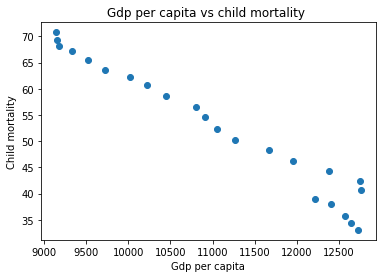

In [138]:
#plot gdp vs child mortality
plt.scatter(gdp.mean(),child_mortality.mean())
plt.xlabel('Gdp per capita')
plt.ylabel('Child mortality')
plt.title('Gdp per capita vs child mortality ');

## Child mortality and GDP
<p>
  In this scatter plot there is a negative correlation between child mortality and gdb per capita as the observer can see that as the GDP grows the child mortality decline so maybe there is a relationship between GDP growth and child mortality. 
</p>

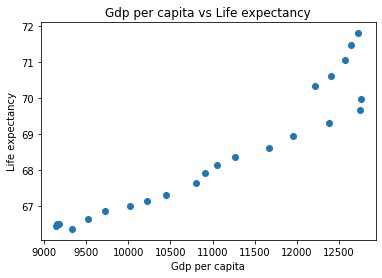

In [139]:
plt.scatter(gdp.mean(), life_expectancy.mean())
plt.xlabel('Gdp per capita')
plt.ylabel('Life expectancy')
plt.title('Gdp per capita vs Life expectancy');

## Life expectancy  and  GDP
<p>
In this scatter plot we can observe that there is a positive correlation between life expectancy and gdb per capita as the observer can see that as the GDP grows the life expectancy grows also. 
</p>

## Limitations
<p>
 <ul>
<li>Some data sets have missing values especially one, where there are like 10 consecutive values missing in the same row which could be problematic luckily its just one row. 
 <li> Another limitation is that most of the datasets have just about  190 countries or less, which could impact the analysis. 
<ul>
</p> 


<a id='conclusions'></a>
## Conclusions

<p>
 Generally, the world is getting better in most of this indicatiors child mortality and population growth are generally in decline, on the other hand, the world saw steady growth in life expectancy, employment rate, GDP per capita and the number of years in school. there is also a correlation between life expectancy and child mortality and GDP. The life expectancy in most countries is above the averge of the wolrd which could indicate that most of the world is geeting better in that area. 
</p>

## Ressources
<ul>
    <li>
        <a href ="https://stackoverflow.com/">stackoverflow </a>
    </li>
    <li>  
       <a href ="https://nbviewer.jupyter.org/github/konstantinstadler/country_converter/blob/master/doc/country_converter_examples.ipynb"> This note book </a> 
    </li>
    <li>
       <a href ="https://github.com/konstantinstadler/country_converter"> This repository </a>
    </li>
 </ul>